# Packages

In [1]:
!pip install gudhi

     |████████████████████████████████| 28.2 MB 20 kB/s 


In [2]:
!pip install pingouin

     |████████████████████████████████| 182 kB 29.4 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 9.8 MB 36.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=84ad7bdd0f0abb3aa1dba143e3b2ef144deab6d92c709886ed4103826ed0b841
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=90b2859c451210624d4ee6b4fcf597d08c4fc5ce735905cf074d614515cfc49d
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [3]:
import gudhi
import pingouin as pg

In [4]:
from IPython.display import Image
from os import chdir
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import norm 
import time
import statsmodels.api as sm
import math
from scipy import stats

#Seed

In [ ]:
np.random.seed(123)

In [ ]:
 np.random.random(1)

array([0.69646919])

In [ ]:
 np.random.random(1)

array([0.28613933])

#Exploratory Gudhi


In [ ]:
mat1 = np.random.random((10, 10))
corrmat = np.corrcoef(mat1)
sq = 1 - corrmat * corrmat
D0 = pd.DataFrame(sq)

In [ ]:
#didn't work
mat = np.random.random((370, 370))
matrix=np.abs(mat-np.diag(mat))
D0=pd.DataFrame(matrix)
D0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369
0,0.000000,0.088503,0.614633,0.577665,0.351182,0.761640,0.399909,0.085904,0.157897,0.570035,0.474401,0.284295,0.234578,0.233028,0.277517,0.371995,0.511801,0.740125,0.332098,0.146241,0.357778,0.308321,0.128725,0.708598,0.471072,0.154236,0.059511,0.816660,0.667170,0.526466,0.267812,0.578665,0.498350,0.243827,0.096063,0.139772,0.587032,0.238813,0.316528,0.142676,...,0.217132,0.337016,0.060701,0.537391,0.294343,0.032640,0.056472,0.309074,0.361325,0.185924,0.404868,0.013303,0.200982,0.728859,0.125560,0.370902,0.326084,0.269399,0.229461,0.367955,0.284018,0.302128,0.596558,0.376362,0.041451,0.017848,0.703613,0.417029,0.199955,0.204831,0.561301,0.004702,0.329003,0.093869,0.320037,0.392904,0.407482,0.082159,0.603900,0.525819
1,0.073011,0.000000,0.751697,0.138320,0.006462,0.666572,0.101350,0.447274,0.794873,0.179912,0.134849,0.110327,0.755241,0.376018,0.184381,0.850099,0.212478,0.525978,0.469469,0.661845,0.120523,0.702526,0.308166,0.152600,0.483760,0.097416,0.067991,0.034390,0.439238,0.094850,0.032165,0.180667,0.071755,0.419297,0.163020,0.714599,0.234775,0.056146,0.074579,0.159439,...,0.045271,0.014570,0.320075,0.049207,0.537140,0.388814,0.028019,0.080095,0.725844,0.430483,0.374417,0.123257,0.956330,0.517866,0.274635,0.015219,0.332730,0.062567,0.348972,0.254177,0.251795,0.027032,0.243854,0.925464,0.263604,0.025153,0.048482,0.200126,0.483137,0.566116,0.171051,0.218622,0.101763,0.230334,0.914184,0.431309,0.013831,0.258866,0.442654,0.470787
2,0.004335,0.919805,0.000000,0.048958,0.312971,0.025182,0.616003,0.062039,0.121739,0.156593,0.315666,0.031801,0.111070,0.138966,0.132545,0.685084,0.543780,0.150385,0.276695,0.659057,0.259356,0.085455,0.732703,0.279123,0.340888,0.549481,0.702631,0.648032,0.278073,0.441193,0.043809,0.044583,0.529439,0.137593,0.085341,0.103931,0.326523,0.144770,0.102636,0.045386,...,0.159919,0.194187,0.474628,0.252370,0.368756,0.723879,0.066334,0.152000,0.464325,0.501455,0.454363,0.112411,0.116660,0.277350,0.842031,0.380800,0.077760,0.252726,0.065369,0.496031,0.502300,0.651634,0.284638,0.120802,0.360474,0.051892,0.291208,0.409565,0.026741,0.361404,0.401485,0.514425,0.157314,0.810583,0.853791,0.402339,0.172078,0.266023,0.050285,0.380138
3,0.035521,0.577965,0.406131,0.000000,0.076186,0.595614,0.157677,0.078412,0.830769,0.467002,0.059063,0.016425,0.236471,0.916689,0.123309,0.367810,0.175104,0.553758,0.479115,0.250409,0.263530,0.225630,0.415780,0.191721,0.108632,0.648784,0.411197,0.045376,0.003242,0.394106,0.643140,0.313818,0.508023,0.334018,0.139839,0.050359,0.665336,0.039948,0.002548,0.514279,...,0.272490,0.095044,0.186774,0.122735,0.840474,0.485246,0.684550,0.367739,0.839555,0.576121,0.210911,0.068962,0.547058,0.072447,0.528147,0.127832,0.346063,0.327202,0.364684,0.601589,0.241537,0.521089,0.525976,0.102241,0.466336,0.214834,0.663262,0.003802,0.256600,0.113815,0.114260,0.242690,0.009134,0.384572,0.103502,0.302898,0.219268,0.046979,0.542473,0.275249
4,0.326333,0.674881,0.695703,0.358701,0.000000,0.696105,0.058694,0.451158,0.650061,0.509178,0.279405,0.251009,0.516052,0.792755,0.000379,0.756936,0.032424,0.287558,0.248944,0.199724,0.259794,0.190966,0.530843,0.344011,0.272681,0.013364,0.450302,0.483262,0.005604,0.234682,0.081261,0.002472,0.558449,0.138130,0.437574,0.057047,0.512135,0.489073,0.045672,0.067923,...,0.368754,0.020125,0.449630,0.132450,0.658876,0.648454,0.347813,0.366912,0.208752,0.325892,0.239042,0.061046,0.864453,0.629408,0.333609,0.619718,0.014776,0.080787,0.120172,0.202121,0.447508,0.824769,0.066122,0.763780,0.468375,0.111129,0.679283,0.084519,0.523017,0.447016,0.345955,0.152175,0.406745,0.933042,0.161131,0.189161,0.530184,0.555345,0.808133,0.196775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
skeleton_protein0 = gd.RipsComplex(
    distance_matrix = D0.values, 
    max_edge_length = 0.8
) 

Rips_simplex_tree_protein0 = skeleton_protein0.create_simplex_tree(max_dimension = 2)
BarCodes_Rips0 = Rips_simplex_tree_protein0.persistence()

Rips_simplex_tree_protein0.betti_numbers()

[1, 0]

In [ ]:
for i in range(20):
    print(BarCodes_Rips0[i])

(1, (0.321212703706785, 0.5906492020578942))
(1, (0.3369597400528107, 0.5994362947202898))
(1, (0.33875376054175177, 0.6009534490353047))
(1, (0.3293477372831217, 0.5901070802573248))
(1, (0.32988188225917936, 0.5850087433669773))
(1, (0.3458510545835548, 0.595246624347452))
(1, (0.3568823965801815, 0.6025203471331422))
(1, (0.37249952614503345, 0.6155930475479985))
(1, (0.3381898679278662, 0.5802393156418972))
(1, (0.3447140150359086, 0.5861154167199774))
(1, (0.3423246871416884, 0.5833640344648745))
(1, (0.35075759320836486, 0.5880850213313182))
(1, (0.35993880532742795, 0.597257849547598))
(1, (0.3611585293062606, 0.5964439257874065))
(1, (0.3596940598789362, 0.5911024058042478))
(1, (0.35348786872264404, 0.5826282268054197))
(1, (0.3403687753510761, 0.567879111767859))
(1, (0.36868703438988015, 0.5939469740058256))
(1, (0.36494570667382265, 0.5900901189126598))
(1, (0.3582578057542958, 0.5784447584622547))


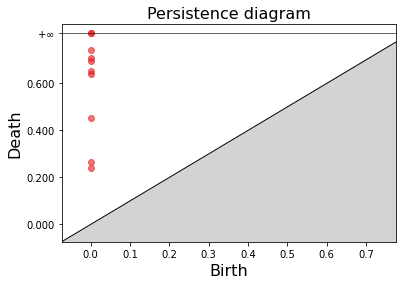

In [ ]:
gd.plot_persistence_diagram(BarCodes_Rips0);

In [ ]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(0)

array([[0.        , 0.238808  ],
       [0.        , 0.26700999],
       [0.        , 0.45169344],
       [0.        , 0.64028373],
       [0.        , 0.65198099],
       [0.        , 0.69509099],
       [0.        , 0.70788538],
       [0.        , 0.74016119],
       [0.        ,        inf],
       [0.        ,        inf]])

In [ ]:
skeleton_protein1 = gd.AlphaComplex(
    points = D0.values
) 

Alpha_simplex_tree_protein0 = skeleton_protein1.create_simplex_tree(max_alpha_square = 0.2**2)

In [ ]:
# helper function to determine if inputted cov_matrix is valid covariance matrix
def is_cov_mat(x,tol=1e-8):

  # check if matrix is symmetric
  if np.array_equal(x,x.T): 

    # check if diagonal entries are non-negative  
    if any(n < 0 for n in x.diagonal()):
      return False
    
    # check if matrix is positive semi-definite
    else:      
      E = np.linalg.eigvalsh(x)
      return np.all(E > -tol)   
  else:
     return False

# generate sample from multivariate normal distribution using Box Muller Transform
def multiNormalSample_BM(mu, cov_matrix, n_samples, n_dim):
  if is_cov_mat(cov_matrix):
    # start counter
    tic = time.perf_counter() 
  
    # initialize sample matrix as zeros
    z = np.zeros((n_dim,n_samples)) 

    # populate matrix independently with values from the univariate standard normal
    for d in list(range(0,n_dim)):
      # simulate theta and r
      theta = np.random.uniform(0,2*np.pi,n_samples)
      r = np.sqrt(2*np.random.exponential(1,n_samples))

     # calculcate x coordinate
      z[d] = np.cos(theta)*r
    
    # compute square root of covariance matrix through eigenvalue decomposition
    eigval, eigvec = np.linalg.eig(cov_matrix)
    eigval_sqrt = np.diag(eigval*1/2)
    cov_sqrt = np.matmul(np.matmul(eigvec, eigval_sqrt),eigvec.T)


    # compute 
    x = np.matmul(cov_sqrt,z) + mu 
  
    # end counter
    toc = time.perf_counter()
  
    
    return x
  
  else:
    return("Inputted covariance matrix is invalid")

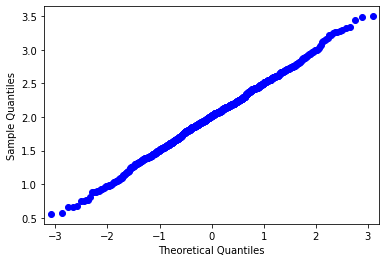

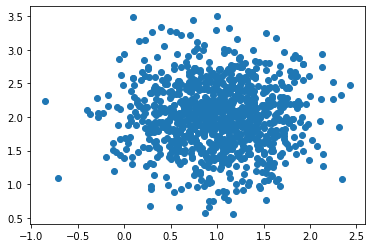

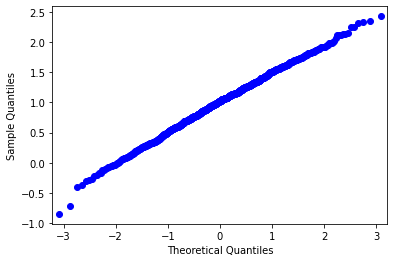

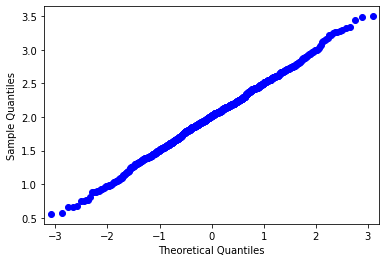

In [ ]:
mu = np.array([[1,2]]).T
cov = np.array([[1,0],[0,1]])

x = multiNormalSample_BM(mu,cov,100,2)
plt.scatter(x[0],x[1])

datapoints = np.array([[x[0][i],x[1][i]] for i in range(len(x[0]))])
sm.qqplot(x[0])
sm.qqplot(x[1])






In [ ]:
mu = np.array([[1,2]]).T
cov = np.array([[1,0],[0,1]])

x = multiNormalSample_BM(mu,cov,1000,2)
plt.scatter(x[0],x[1])

datapoints = np.array([[x[0][i],x[1][i]] for i in range(len(x[0]))])
sm.qqplot(x[0])
sm.qqplot(x[1])

# Gudhi Betti Numbers Method

https://gudhi.inria.fr/python/latest/simplex_tree_ref.html 

https://geometrica.saclay.inria.fr/team/Fred.Chazal/slides/MVA2019_TP1.html


In [ ]:
mu = [0,0]
cov = np.array([[1,0],[0,1]])
x = np.random.multivariate_normal(mu,cov,20)
dist_matrix = scipy.spatial.distance_matrix(x, x)

In [ ]:
D0 = pd.DataFrame(dist_matrix)

skeleton = gd.RipsComplex(
    distance_matrix = D0.values, 
    max_edge_length = 2
) 

rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = 2)
filtered = rips_simplex_tree.get_filtration()

for filter in filtered:
  print(filter)

# barCodes = rips_simplex_tree.persistence()
# gd.plot_persistence_diagram(barCodes);

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([15, 19], 0.09924758684009573)
([11, 14], 0.10732057409271646)
([12, 17], 0.14466592348767984)
([0, 13], 0.17016974770386642)
([3, 13], 0.21768137132590187)
([2, 5], 0.22212097134971132)
([0, 3], 0.2309247896753178)
([0, 3, 13], 0.2309247896753178)
([2, 13], 0.2619264217669605)
([3, 6], 0.3240280245015823)
([5, 13], 0.3518698747873188)
([2, 5, 13], 0.3518698747873188)
([0, 9], 0.37064087641949744)
([2, 3], 0.394016411101912)
([2, 3, 13], 0.394016411101912)
([0, 6], 0.3954762306010514)
([0, 3, 6], 0.3954762306010514)
([7, 19], 0.3991313899403393)
([8, 12], 0.40590443452080316)
([0, 2], 0.432030960774648)
([0, 2, 3], 0.432030960774648)
([0, 2, 13], 0.432030960774648)
([0, 5], 0.49293448019585917)
([0, 2, 5], 0.49293448019585917)
([0, 5, 13], 0.49293448019585917

In [ ]:
rips_simplex_tree.persistence()

[(1, (0.7954068998123519, 0.8906647039713925)),
 (1, (1.2256990286838596, 1.268687442253994)),
 (0, (0.0, inf)),
 (0, (0.0, 1.5011192535642275)),
 (0, (0.0, 0.9055976816161608)),
 (0, (0.0, 0.8297453387751957)),
 (0, (0.0, 0.769359302443826)),
 (0, (0.0, 0.6190449249591621)),
 (0, (0.0, 0.6014902567563615)),
 (0, (0.0, 0.588849779423237)),
 (0, (0.0, 0.5759221871965822)),
 (0, (0.0, 0.40590443452080316)),
 (0, (0.0, 0.3991313899403393)),
 (0, (0.0, 0.37064087641949744)),
 (0, (0.0, 0.3240280245015823)),
 (0, (0.0, 0.2619264217669605)),
 (0, (0.0, 0.22212097134971132)),
 (0, (0.0, 0.21768137132590187)),
 (0, (0.0, 0.17016974770386642)),
 (0, (0.0, 0.14466592348767984)),
 (0, (0.0, 0.10732057409271646)),
 (0, (0.0, 0.09924758684009573))]

In [ ]:
rips_simplex_tree.betti_numbers()

[1, 0]

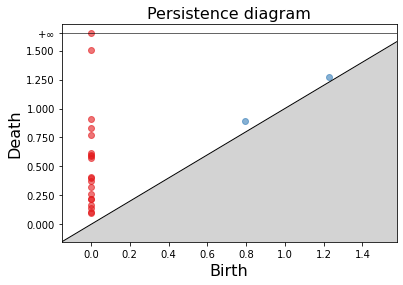

In [ ]:
barCodes = rips_simplex_tree.persistence()

gd.plot_persistence_diagram(barCodes);

#Functions

## Data Generation Functions

In [ ]:


# helper function to determine if inputted cov_matrix is valid covariance matrix
def is_cov_mat(x,tol=1e-8):

  # check if matrix is symmetric
  if np.array_equal(x,x.T): 

    # check if diagonal entries are non-negative  
    if any(n < 0 for n in x.diagonal()):
      return False
    
    # check if matrix is positive semi-definite
    else:      
      E = np.linalg.eigvalsh(x)
      return np.all(E > -tol)   
  else:
     return False

# generate sample from multivariate normal distribution using Inverse Transform Sampling
def multiNormalSample_ITS(mu, cov_matrix, n_samples, n_dim):
  if is_cov_mat(cov_matrix):
    # start counter
    tic = time.perf_counter() 
  
    # initialize sample matrix as zeros
    z = np.zeros((n_dim,n_samples)) 

    # populate matrix independently with values from the univariate standard normal
    for d in list(range(0,n_dim)):
      u = np.random.uniform(0, 1, n_samples)
      z[d] = norm.ppf(u)
    
    # print("z",z[0])
    # compute square root of covariance matrix through eigenvalue decomposition
    eigval, eigvec = np.linalg.eig(cov_matrix)
    eigval_sqrt = np.diag(np.sqrt(eigval))
    cov_sqrt = np.matmul(np.matmul(eigvec, eigval_sqrt),eigvec.T)

    # compute 
    x = np.matmul(cov_sqrt,z) + mu 
  
    # end counter
    toc = time.perf_counter()
  

    return x

  else:
    return("Inputted covariance matrix is invalid")

In [ ]:
# helper function to determine if inputted cov_matrix is valid covariance matrix
def is_cov_mat(x,tol=1e-8):

  # check if matrix is symmetric
  if np.array_equal(x,x.T): 

    # check if diagonal entries are non-negative  
    if any(n < 0 for n in x.diagonal()):
      return False
    
    # check if matrix is positive semi-definite
    else:      
      E = np.linalg.eigvalsh(x)
      return np.all(E > -tol)   
  else:
     return False

# generate sample from multivariate normal distribution using Box Muller Transform
def multiNormalSample_BM(mu, cov_matrix, n_samples, n_dim):
  if is_cov_mat(cov_matrix):
    # start counter
    tic = time.perf_counter() 
  
    # initialize sample matrix as zeros
    z = np.zeros((n_dim,n_samples)) 

    # populate matrix independently with values from the univariate standard normal
    for d in list(range(0,n_dim)):
      # simulate theta and r
      theta = np.random.uniform(0,2*np.pi,n_samples)
      r = np.sqrt(2*np.random.exponential(1,n_samples))

     # calculcate x coordinate
      z[d] = np.cos(theta)*r
    
    # compute square root of covariance matrix through eigenvalue decomposition
    eigval, eigvec = np.linalg.eig(cov_matrix)
    eigval_sqrt = np.diag(np.sqrt(eigval))
    cov_sqrt = np.matmul(np.matmul(eigvec, eigval_sqrt),eigvec.T)


    # compute, NOT WORKING
    x = np.matmul(cov_sqrt,z) + mu 

  
    # end counter
    toc = time.perf_counter()
  
    
    return x
  
  else:
    return("Inputted covariance matrix is invalid")

In [ ]:
# generate sample from multivariate normal distribution using Box Muller Transform
def BAD_multiNormalSample_BM(mu, cov_matrix, n_samples, n_dim):
  if is_cov_mat(cov_matrix):
    # start counter
    tic = time.perf_counter() 
  
    # initialize sample matrix as zeros
    z = np.zeros((n_dim,n_samples)) 

    # populate matrix independently with values from the univariate standard normal
    for d in list(range(0,n_dim)):
      # simulate theta and r
      theta = np.random.uniform(0,2*np.pi,n_samples)
      r = np.sqrt(2*np.random.exponential(1,n_samples))

     # calculcate x coordinate
      z[d] = np.cos(theta)*r
    
    # compute square root of covariance matrix through eigenvalue decomposition
    eigval, eigvec = np.linalg.eig(cov_matrix)
    eigval_sqrt = np.diag(eigval*1/2) #BAD BAD
    cov_sqrt = np.matmul(np.matmul(eigvec, eigval_sqrt),eigvec.T)


    # compute, NOT WORKING
    x = np.matmul(cov_sqrt,z) + mu 
  
    # end counter
    toc = time.perf_counter()
  
    
    return x
  
  else:
    return("Inputted covariance matrix is invalid")

In [ ]:
# generate sample from normal distribution using Box-Muller Transform
def BoxMuller(mu,sigma,n,plot=False):
  
  # start counter
  tic = time.perf_counter() 

  # simulate theta and r
  u1, u2 = np.random.uniform(0,1,n), np.random.uniform(0,1,n)
  r = np.sqrt(-2*np.log(1-u1))
  theta = 2*np.pi*u2

  # calculcate x coordinate
  x = np.cos(theta)*r*sigma + mu
  # end counter
  toc = time.perf_counter() 

  if plot == True:

    # plot histogram of generated data
    plt.hist(x,density=True)
    plt.show()

    # plot qqplot of generated data
    # sm.qqplot(x)
    # plt.show()

    # mean and standard deviation from generated data
    mu_new, sigma_new = norm.fit(x)
    
    print("univariate Box Muller transform took {} seconds".format(toc - tic))
    print("given: mu = {}, sigma = {}".format(mu, sigma)) # print given parameters
    print("generated: mu = {}, sigma = {}".format(mu_new, sigma_new)) # print generated parameters

  return x

In [ ]:
def unif_sphere(n_samples=1000,n_features=3,radius=1,plot=False,normnum=2):
  # generate random normal data
  X = np.zeros((n_features,n_samples))

  for i in range(n_features):
    x=BoxMuller(mu=0, sigma=1, n=n_samples,plot=False).tolist()
    X[i,:] = x

  for i in range(n_samples):
    X[:,i] = X[:,i]/np.linalg.norm(X[:,i],normnum) * radius
 
  # if plot != False:
  #   for j in range(n_features):
      # sm.qqplot(X[j,:], dist=scipy.stats.uniform)

  # plot
  if plot != False:
    if n_features == 2:
      plt.scatter(X[0,:],X[1,:])
    elif n_features == 3:
      fig = plt.figure(figsize=plt.figaspect(1))
      ax = fig.add_subplot(projection='3d')
      ax.set_xlabel('x')
      ax.set_ylabel('y')
      ax.set_zlabel('z')
      ax.scatter(X[0,:],X[1,:],X[2,:])
      ax.view_init(0,45)
    else:
      print("no visualization available")

  return(X)

## Betti Functions

In [ ]:
def calc_betti(x, t = 0.1, plot = False, dim =1):
  dist_matrix = scipy.spatial.distance_matrix(x, x)

  D0 = pd.DataFrame(dist_matrix)
  skeleton = gd.RipsComplex(
      distance_matrix = D0.values, 
      max_edge_length = 1
  ) 

  rips_simplex_tree = skeleton.create_simplex_tree(max_dimension = 2)
  barCodes = rips_simplex_tree.persistence()

  betti = 0
  for code in barCodes:
    if code[0] == dim:
      x = code[1][0] 
      y = code[1][1]
      if x <= t and y >= t:
        betti += 1

  if plot == True:
    gd.plot_persistence_diagram(barCodes);
  return(betti)

In [ ]:
# set seed
# separate betti numbers
# different choice of t
# change sample size
# generate, plot, 2 data + 2 plots should look the same, betti numbers should look the same, output should be similar
# rewrite subset of code for testing (for our data generator)
# plot persistence diagrams (validate numbers)
# use inbuilt betti calculator
# change sample size, t 

def many_bettis(id = "random", mu = [0,0], cov = np.array([[1,0],[0,1]]), n=20, iters = 100, t = .75, dim = 0):
  bettiNumbers = []
  for i in range(iters):
    if id == "random":
      x = np.random.multivariate_normal(np.array(mu).T,cov,n)
    else:
      data = multiNormalSample_BM(np.array([mu]).T,cov,n,2)
      # print(len(data[0]))
      x = [[data[0][i],data[1][i]] for i in range(len(data[0]))]
    betti = calc_betti(x, t=t, dim=dim)
    bettiNumbers.append(betti)    
  plt.hist(bettiNumbers) 
  sm.qqplot(np.array(bettiNumbers)) 
  # plt.scatter(list(range(len(data[0]))), data[0])
  plt.show()
  return

In [ ]:
def many_bettis_plots(id = "random", mu = [0,0], cov = np.array([[1,0],[0,1]]), n=20, iters = 100, t = .75, dim = 0):
  bettiNumbers = []
  for i in range(iters):
    if id == "random":
      x = np.random.multivariate_normal(np.array(mu).T,cov,n)
    else:
      data = multiNormalSample_BM(np.array([mu]).T,cov,n,2)
      # print(len(data[0]))
      x = [[data[0][i],data[1][i]] for i in range(len(data[0]))]
    betti = calc_betti(x, t=t, dim=dim)
    bettiNumbers.append(betti)    
  # plt.hist(bettiNumbers) 
  # sm.qqplot(np.array(bettiNumbers)) 
  # plt.show()
  return(bettiNumbers)

# Normal Data



### Testing Normality

In [ ]:
mu = np.array([[0,0]]).T
cov = np.array([[1,0],[0,1]])
n=100
x = multiNormalSample_BM(mu=mu, cov_matrix=cov, n_samples=n, n_dim=2)
pg.multivariate_normality(pd.DataFrame(x.T),alpha=.05)

HZResults(hz=0.38293220504487246, pval=0.8445306544771157, normal=True)

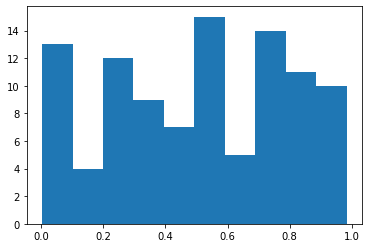

94.0% of p values are greater than 0.05


In [ ]:
np.random.seed(123)
mu = np.array([[0,0]]).T
cov = np.array([[1,0],[0,1]])
n=100

def BM_check_normality(mu=mu, cov=cov, n_sample = n, iter = 100,alpha=0.05):
  p_values = []
  for i in range(iter):
    x = multiNormalSample_BM(mu=mu, cov_matrix=cov, n_samples=n, n_dim=2)
    p_values.append(pg.multivariate_normality(pd.DataFrame(x.T),alpha=alpha)[1])
  plt.hist(p_values)
  plt.show()
  print("{}% of p values are greater than {}".format(len([i for i in p_values if i>= alpha])*100/len(p_values), alpha))
BM_check_normality(mu,cov,n)

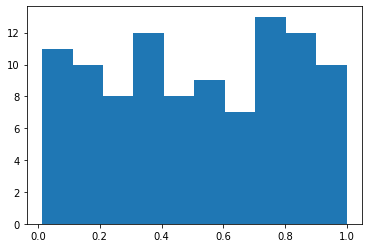

94.0% of p values are greater than 0.05


In [ ]:
mu = [0,0]
cov = np.array([[1,0],[0,1]])
n=100

def py_check_normality(mu=mu, cov=cov, n_sample = n, iter = 100,alpha=0.05):
  p_values = []
  for i in range(iter):
    x = np.random.multivariate_normal(np.array(mu).T,cov,n)
    p_values.append(pg.multivariate_normality(pd.DataFrame(x),alpha=alpha)[1])
  plt.hist(p_values)
  plt.show()
  print("{}% of p values are greater than {}".format(len([i for i in p_values if i>= alpha])*100/len(p_values), alpha))
py_check_normality(mu,cov,n)

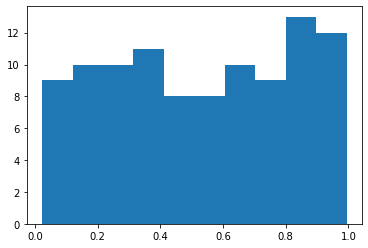

97.0% of p values are greater than 0.05


In [ ]:
mu = np.array([[0,0]]).T
cov = np.array([[1,0],[0,1]])
n=100

def ITS_check_normality(mu=mu, cov=cov, n_sample = n, iter = 100,alpha=0.05):
  p_values = []
  for i in range(iter):
    x = multiNormalSample_ITS(mu=mu, cov_matrix=cov, n_samples=n, n_dim=2)
    p_values.append(pg.multivariate_normality(pd.DataFrame(x.T),alpha=alpha)[1])
  plt.hist(p_values)
  plt.show()
  print("{}% of p values are greater than {}".format(len([i for i in p_values if i>= alpha])*100/len(p_values), alpha))
ITS_check_normality(mu,cov,n)

92.0% of p values are greater than 0.05


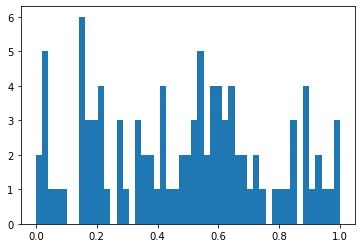

95.0% of p values are greater than 0.05


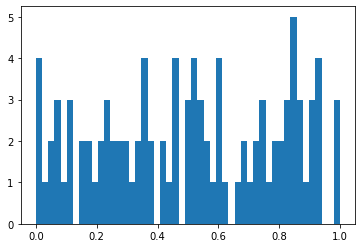

In [ ]:
mu = np.array([[0,0]]).T
cov = np.array([[1,0],[0,1]])
n=100

def BM_check_normality(mu=mu, cov=cov, n_sample = n, iter = 100,alpha=0.05):
  pvalues_X = []
  pvalues_Y = []
  for i in range(iter):
    x = multiNormalSample_BM(mu=mu, cov_matrix=cov, n_samples=n, n_dim=2)
    pvalue_X = stats.kstest(x[0], 'norm')[1]
    pvalue_Y = stats.kstest(x[1], 'norm')[1]
    pvalues_X.append(pvalue_X)
    pvalues_Y.append(pvalue_Y)
  plt.hist(pvalues_X,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_X if i>= alpha])*100/len(pvalues_X), alpha))
  plt.show()
  plt.hist(pvalues_Y,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_Y if i>= alpha])*100/len(pvalues_Y), alpha))

BM_check_normality(mu,cov,n)


97.0% of p values are greater than 0.05


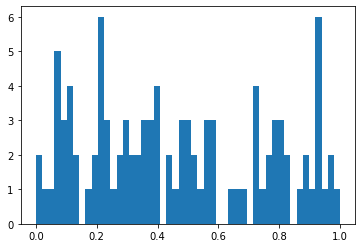

97.0% of p values are greater than 0.05


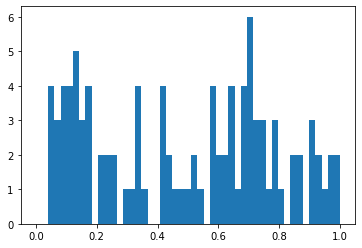

In [ ]:
mu = np.array([[0,0]]).T
cov = np.array([[1,0],[0,1]])
n=100

def ITS_check_normality(mu=mu, cov=cov, n_sample = n, iter = 100,alpha=0.05):
  pvalues_X = []
  pvalues_Y = []
  for i in range(iter):
    x = multiNormalSample_ITS(mu=mu, cov_matrix=cov, n_samples=n, n_dim=2)
    pvalue_X = stats.kstest(x[0], 'norm')[1]
    pvalue_Y = stats.kstest(x[1], 'norm')[1]
    pvalues_X.append(pvalue_X)
    pvalues_Y.append(pvalue_Y)
  plt.hist(pvalues_X,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_X if i>= alpha])*100/len(pvalues_X), alpha))
  plt.show()
  plt.hist(pvalues_Y,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_Y if i>= alpha])*100/len(pvalues_Y), alpha))

ITS_check_normality(mu,cov,n)



94.0% of p values are greater than 0.05


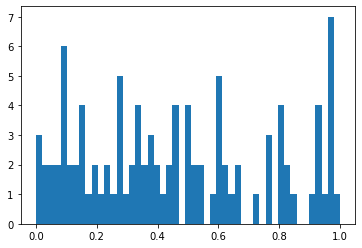

96.0% of p values are greater than 0.05


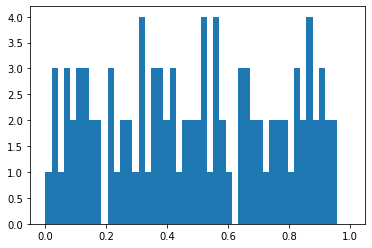

In [ ]:
mu = [0,0]
cov = np.array([[1,0],[0,1]])
n=20

def Python_check_normality(mu=mu, cov=cov, n_sample = n, iter = 100,alpha = 0.05):
  pvalues_X = []
  pvalues_Y = []
  for i in range(iter):
    x = np.random.multivariate_normal(np.array(mu).T,cov,n)
    pvalue_X = stats.kstest(x[0], 'norm')[1]
    pvalue_Y = stats.kstest(x[1], 'norm')[1]
    pvalues_X.append(pvalue_X)
    pvalues_Y.append(pvalue_Y)
  plt.hist(pvalues_X,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_X if i>= alpha])*100/len(pvalues_X), alpha))
  plt.show()
  plt.hist(pvalues_Y,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_Y if i>= alpha])*100/len(pvalues_Y), alpha))

Python_check_normality(mu,cov,n)

Box Muller not working...


96.0% of p values are greater than 0.05


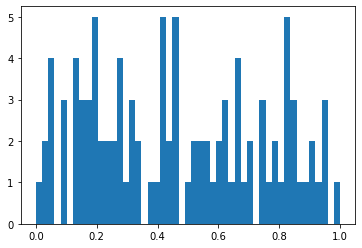

98.0% of p values are greater than 0.05


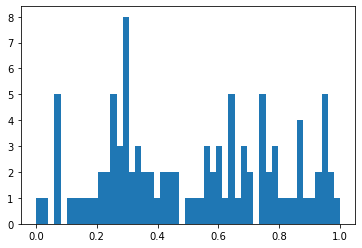

In [ ]:
mu = np.array([[0,0]]).T
cov = np.array([[1,0],[0,1]])
n=100

def BAD_BM_check_normality(mu=mu, cov=cov, n_sample = n, iter = 100,alpha=0.05):
  pvalues_X = []
  pvalues_Y = []
  for i in range(iter):
    x = BAD_multiNormalSample_BM(mu=mu, cov_matrix=cov, n_samples=n, n_dim=2)
    pvalue_X = stats.kstest(x[0], 'norm')[1]
    pvalue_Y = stats.kstest(x[1], 'norm')[1]
    pvalues_X.append(pvalue_X)
    pvalues_Y.append(pvalue_Y)
  plt.hist(pvalues_X,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_X if i>= alpha])*100/len(pvalues_X), alpha))
  plt.show()
  plt.hist(pvalues_Y,bins=list(np.linspace(0,1,50)))
  print("{}% of p values are greater than {}".format(len([i for i in pvalues_Y if i>= alpha])*100/len(pvalues_Y), alpha))

BAD_BM_check_normality(mu,cov,n)

### Our Normal Data

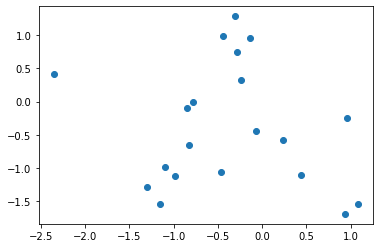

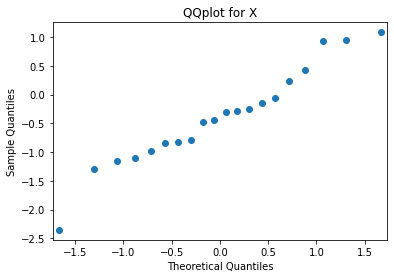

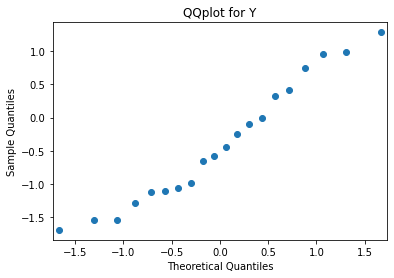

In [ ]:
np.random.seed(123)
mu = np.array([[0,0]]).T
cov = np.array([[1,0],[0,1]])
n=20
x = multiNormalSample_BM(mu=mu, cov_matrix=cov, n_samples=n, n_dim=2)

plt.scatter(x[0],x[1])

fig1 = sm.qqplot(x[0])
plt.title("QQplot for X")
plt.show()

fig2 = sm.qqplot(x[1])
plt.title("QQplot for Y")
plt.show()


### Python's Normal Data

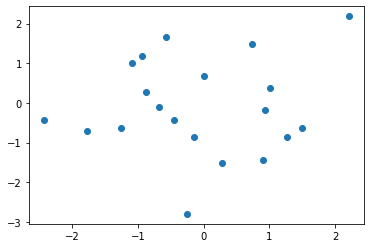

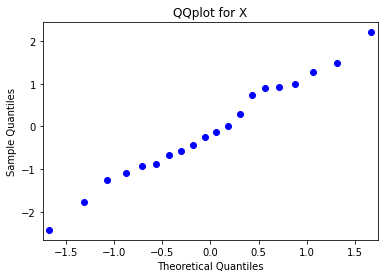

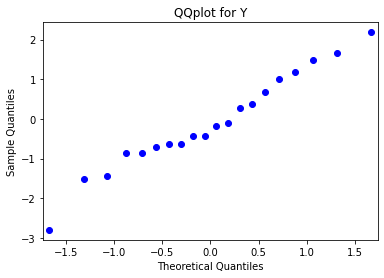

In [ ]:
np.random.seed(123)
mu = [0,0]
cov = np.array([[1,0],[0,1]])
n=20

xtrue = np.random.multivariate_normal(np.array(mu).T,cov,n)

plt.scatter(x[:,0],x[:,1])

fig1 = sm.qqplot(x[:,0])
plt.title("QQplot for X")
plt.show()

fig2 = sm.qqplot(x[:,1])
plt.title("QQplot for Y")
plt.show()

#Betti Number Distribution

## Using our normal data

### histograms and qqplots

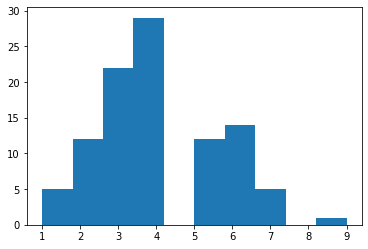

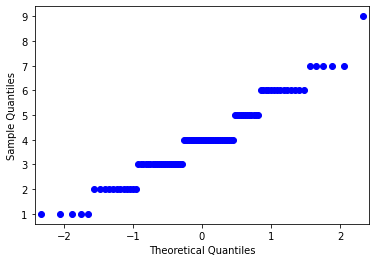

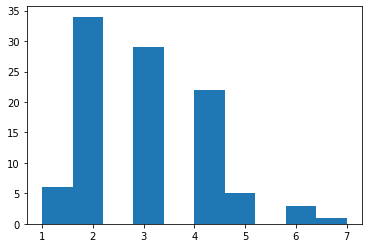

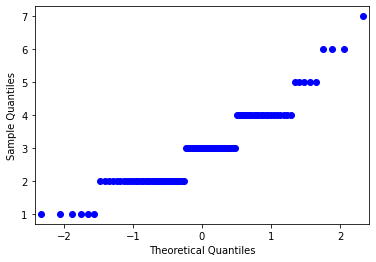

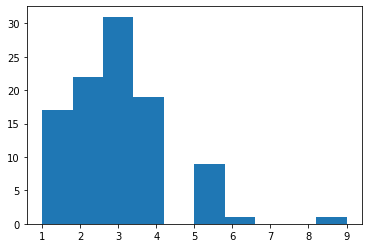

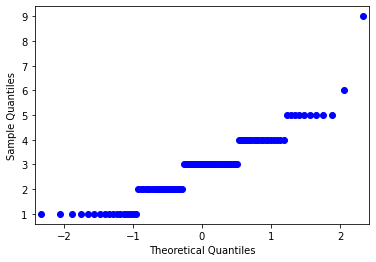

In [ ]:
np.random.seed(123)
nlist = [20,50,100]
for n in nlist:
  many_bettis("multivar",n=n,t=0.45,dim=0)

### histograms

#### variable n

Text(0.5, 1.0, 'n=100')

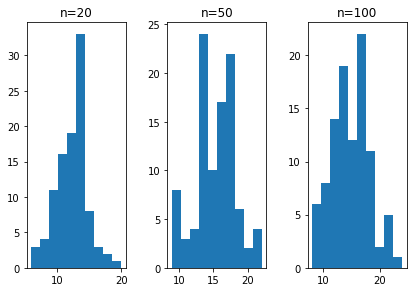

In [ ]:
np.random.seed(123)
nlist = [20,50,100]
bettiNumbers = []
for n in nlist:
  bettiNumbers.append(many_bettis_plots("multivar",n=n,t=0.45,dim=0))

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.tight_layout()
ax1.hist(bettiNumbers[0]) 
ax1.set_title("n={}".format(nlist[0]))
ax2.hist(bettiNumbers[1]) 
ax2.set_title("n={}".format(nlist[1]))
ax3.hist(bettiNumbers[2]) 
ax3.set_title("n={}".format(nlist[2]))

#### variable n and t

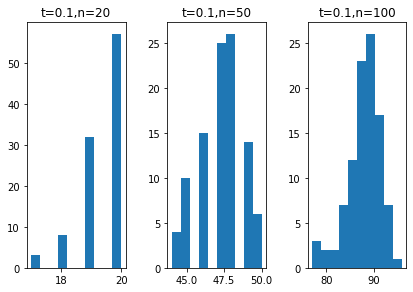

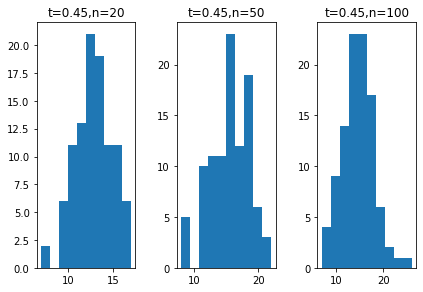

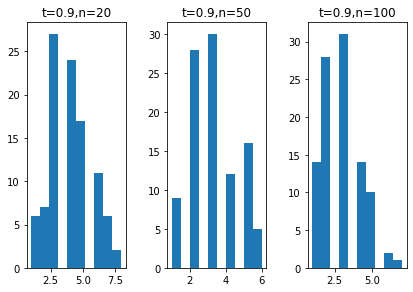

In [ ]:
np.random.seed(123)
nlist = [20,50,100]
tlist = [0.1,0.45,0.9]

for t in tlist:
  bettiNumbers = []
  for n in nlist:
    bettiNumbers.append(many_bettis_plots("multivar",n=n,t=t,dim=0))

  fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
  fig.tight_layout()
  ax1.hist(bettiNumbers[0]) 
  ax1.set_title("t={},n={}".format(t,nlist[0]))
  ax2.hist(bettiNumbers[1]) 
  ax2.set_title("t={},n={}".format(t,nlist[1]))
  ax3.hist(bettiNumbers[2]) 
  ax3.set_title("t={},n={}".format(t,nlist[2]))

## Using python's normal data

### histograms and qqplots


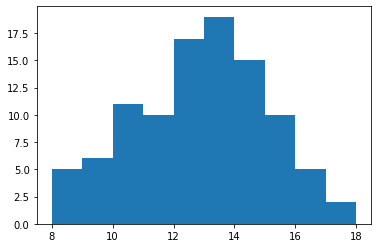

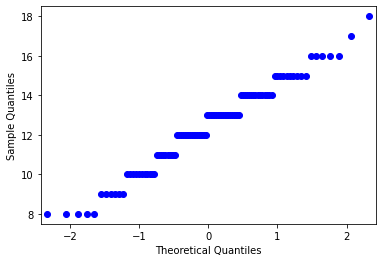

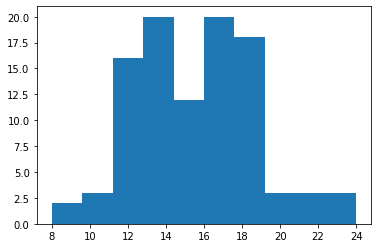

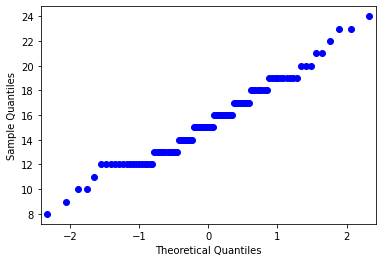

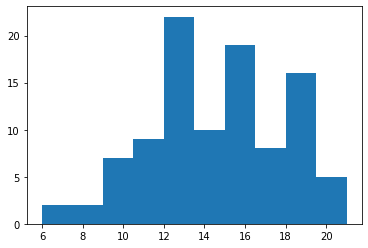

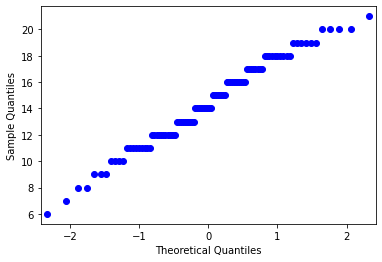

In [ ]:
np.random.seed(123)
nlist = [20,50,100]
for n in nlist:
  many_bettis("random",n=n,t=0.45,dim=0)

### histograms

#### variable n

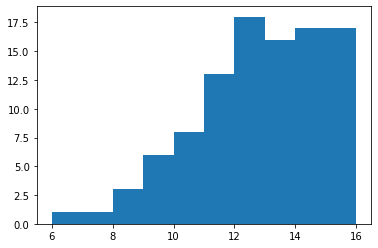

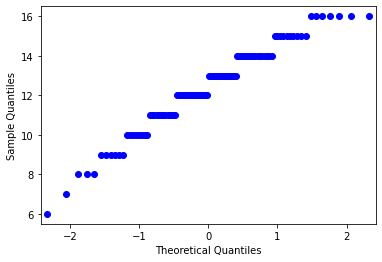

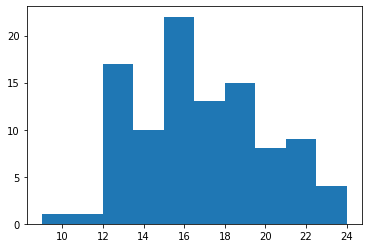

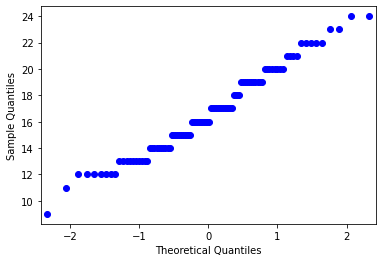

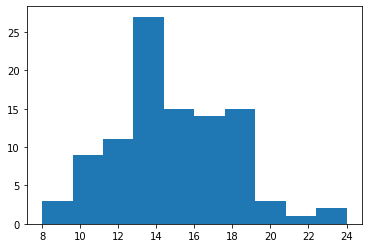

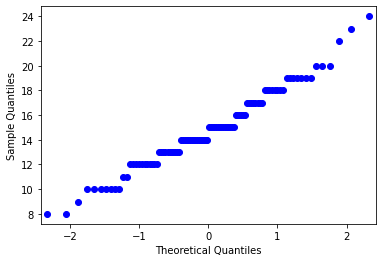

In [ ]:
np.random.seed(123)
nlist = [20,50,100]
for n in nlist:
  many_bettis("random",n=n,t=0.45,dim=0)

#### variable n and t

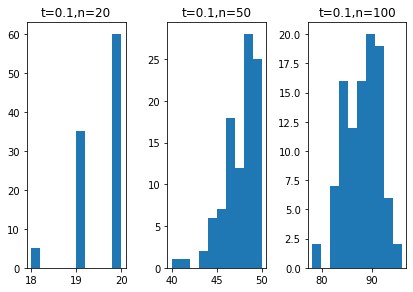

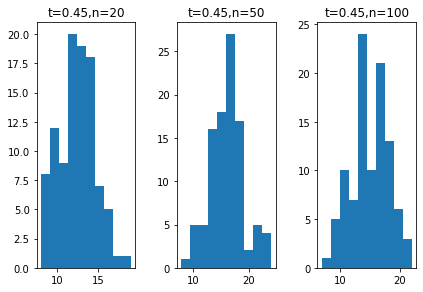

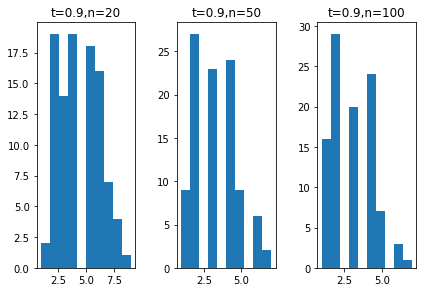

In [ ]:
np.random.seed(123)
nlist = [20,50,100]
tlist = [0.1,0.45,0.9]

for t in tlist:
  bettiNumbers = []
  for n in nlist:
    bettiNumbers.append(many_bettis_plots("random",n=n,t=t,dim=0))

  fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
  fig.tight_layout()
  ax1.hist(bettiNumbers[0]) 
  ax1.set_title("t={},n={}".format(t,nlist[0]))
  ax2.hist(bettiNumbers[1]) 
  ax2.set_title("t={},n={}".format(t,nlist[1]))
  ax3.hist(bettiNumbers[2]) 
  ax3.set_title("t={},n={}".format(t,nlist[2]))

#Sphere

1

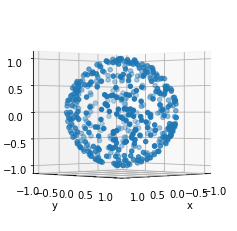

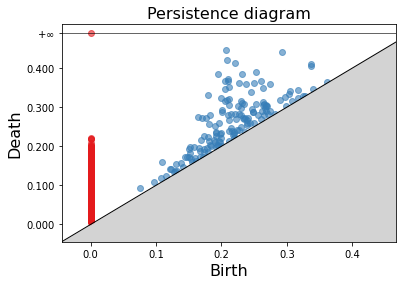

In [ ]:
X = unif_sphere(n_samples=500,n_features=3,plot=True)
calc_betti(X.T, plot = True)

# changes to persistence diagram, scale, asymptotic normality
# due to changing n, t, etc

In [ ]:
X.shape

(3, 100)

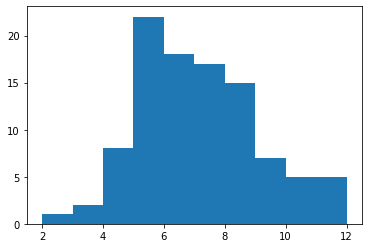

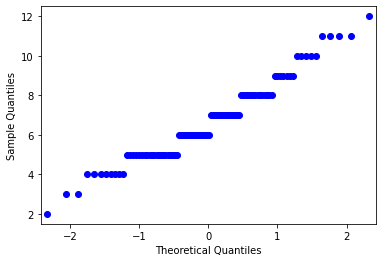

In [ ]:
calc_betti(n=50)

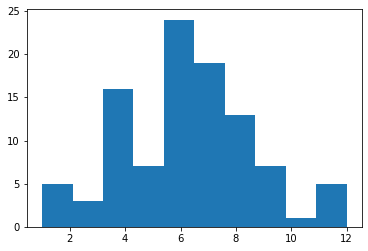

In [ ]:
calc_betti(n=100)

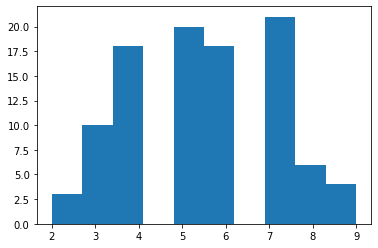

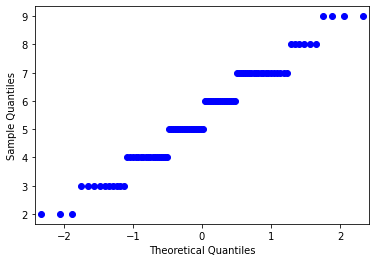

In [ ]:
#long time --> but not THAT long
calc_betti(n=200)

* simulate cld
* 3 different regimes? subcritical, supercritical
* betti numbers
* every time you generate the data randomly, you will get a different betti number
* start with 10 data points (20?)
* fix a value of t (time)
* calculate the betti number 
* repeat (eg 100 times) and plot the histogram
* then increase the sample size
* plot histogram again
* take a range (eg 20 -50, 100, 150..)
* observe the histogram
* rescaling? talk about next time